# BHARAT INTERN

# NAME - SAKSHAM JAIN

# TASK 1 - STOCK PREDICTION

# Importing the libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Reading the Dataset


In [18]:
tg = pd.read_csv("GOOG.csv")

In [19]:
tg.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [20]:
tg.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [21]:
tg.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


# Sorting The Data


Checking for null values

In [22]:
NAN = [(c, tg[c].isnull().mean()*100)for c in tg]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,symbol,0.0
1,date,0.0
2,close,0.0
3,high,0.0
4,low,0.0
5,open,0.0
6,volume,0.0
7,adjClose,0.0
8,adjHigh,0.0
9,adjLow,0.0


In [24]:
srt=tg.sort_values(by='symbol')
srt.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.12,716.48,1306065,718.27,722.47,713.12,716.48,1306065,0.0,1.0
841,GOOG,2019-10-16 00:00:00+00:00,1243.64,1254.74,1238.45,1241.17,1168174,1243.64,1254.74,1238.45,1241.17,1168174,0.0,1.0
840,GOOG,2019-10-15 00:00:00+00:00,1243.01,1247.33,1220.40,1220.40,1395259,1243.01,1247.33,1220.40,1220.40,1395259,0.0,1.0
839,GOOG,2019-10-14 00:00:00+00:00,1217.14,1226.33,1211.76,1212.34,882039,1217.14,1226.33,1211.76,1212.34,882039,0.0,1.0
838,GOOG,2019-10-11 00:00:00+00:00,1215.45,1228.39,1213.74,1222.21,1277144,1215.45,1228.39,1213.74,1222.21,1277144,0.0,1.0


In [25]:
srt.reset_index(inplace=True)

In [26]:
srt.head()

,index,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.12,716.48,1306065,718.27,722.47,713.12,716.48,1306065,0.0,1.0
1,841,GOOG,2019-10-16 00:00:00+00:00,1243.64,1254.74,1238.45,1241.17,1168174,1243.64,1254.74,1238.45,1241.17,1168174,0.0,1.0
2,840,GOOG,2019-10-15 00:00:00+00:00,1243.01,1247.33,1220.40,1220.40,1395259,1243.01,1247.33,1220.40,1220.40,1395259,0.0,1.0
3,839,GOOG,2019-10-14 00:00:00+00:00,1217.14,1226.33,1211.76,1212.34,882039,1217.14,1226.33,1211.76,1212.34,882039,0.0,1.0
4,838,GOOG,2019-10-11 00:00:00+00:00,1215.45,1228.39,1213.74,1222.21,1277144,1215.45,1228.39,1213.74,1222.21,1277144,0.0,1.0


# Data Visualization


Plotting the graph for the date and close

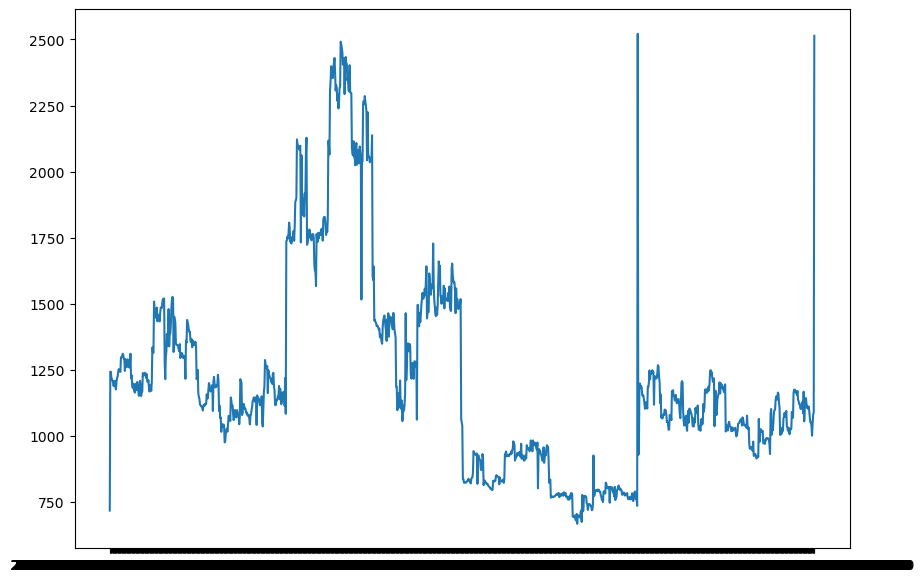

In [27]:
plt.figure(figsize=(10,7))
plt.plot(srt['date'],srt['close'])

In [28]:
close_srt = srt['close']
close_srt

0        718.27
1       1243.64
2       1243.01
3       1217.14
4       1215.45
         ...   
1253    1001.52
1254    1048.58
1255    1080.60
1256    1089.52
1257    2513.93
Name: close, Length: 1258, dtype: float64

# Feature Scaling(MinMax Scaler)

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.02698372],
       [0.31045572],
       [0.31011579],
       ...,
       [0.22248481],
       [0.22729774],
       [0.99586153]])

# Splitting the dataset

In [30]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [31]:
train_data.shape

(880, 1)

In [32]:
test_data.shape

(378, 1)

# Convert an array of values into a dataset matrix

In [34]:
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

# Reshaping of dataset

In [36]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [39]:
print(X_test.shape), print(y_test.shape)

(1, 100)
(1,)


(None, None)

In [40]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
X_train

array([[[0.02698372],
        [0.31045572],
        [0.31011579],
        [0.29615721],
        [0.29524534],
        [0.29158708],
        [0.28815544],
        [0.28104395],
        [0.29105291],
        [0.29176514],
        [0.28034252],
        [0.27429937],
        [0.28966083],
        [0.2971608 ],
        [0.30044676],
        [0.30924169],
        [0.31554383],
        [0.31145392],
        [0.31181003],
        [0.31000248],
        [0.33978655],
        [0.3402182 ],
        [0.34042863],
        [0.34700055],
        [0.34564624],
        [0.33644124],
        [0.33656534],
        [0.31200967],
        [0.33620922],
        [0.31934238],
        [0.31997906],
        [0.32069669],
        [0.33547002],
        [0.322051  ],
        [0.31981719],
        [0.3188136 ],
        [0.32669667],
        [0.34704911],
        [0.29703131],
        [0.30305826],
        [0.28218783],
        [0.27756915],
        [0.28607271],
        [0.27482275],
        [0.26924364],
        [0

In [42]:
X_test

array([[[0.04437394],
        [0.06563825],
        [0.06652314],
        [0.06301596],
        [0.06179654],
        [0.08396193],
        [0.08150151],
        [0.0737911 ],
        [0.07225604],
        [0.07435765],
        [0.07356988],
        [0.07533426],
        [0.04298186],
        [0.07451412],
        [0.073667  ],
        [0.07467059],
        [0.07440081],
        [0.06785587],
        [0.06401416],
        [0.06360409],
        [0.0558775 ],
        [0.07535045],
        [0.04844227],
        [0.05534872],
        [0.05394585],
        [0.06857349],
        [0.07058068],
        [0.07522095],
        [0.07815619],
        [0.07074255],
        [0.06944759],
        [0.0719242 ],
        [0.06858429],
        [0.06852493],
        [0.05949799],
        [0.05931453],
        [0.06360409],
        [0.06194762],
        [0.06349617],
        [0.05763648],
        [0.05859691],
        [0.06026957],
        [0.0583649 ],
        [0.06274078],
        [0.05419405],
        [0

# Creating the stacked LSTM Model


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Prediction and Checking Performance

In [52]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=64,verbose=1)

Epoch 1/70
1/1 [==============================] - 0s 63ms/step - loss: 1.9232e-05 - val_loss: 1.0560e-04
Epoch 2/70
1/1 [==============================] - 0s 41ms/step - loss: 3.3250e-05 - val_loss: 9.5775e-05
Epoch 3/70
1/1 [==============================] - 0s 42ms/step - loss: 4.0068e-05 - val_loss: 9.9744e-05
Epoch 4/70
1/1 [==============================] - 0s 42ms/step - loss: 3.6906e-05 - val_loss: 1.1643e-04
Epoch 5/70
1/1 [==============================] - 0s 41ms/step - loss: 2.6070e-05 - val_loss: 1.4493e-04
Epoch 6/70
1/1 [==============================] - 0s 42ms/step - loss: 1.3027e-05 - val_loss: 1.8318e-04
Epoch 7/70
1/1 [==============================] - 0s 47ms/step - loss: 3.3138e-06 - val_loss: 2.2705e-04
Epoch 8/70
1/1 [==============================] - 0s 42ms/step - loss: 1.7588e-10 - val_loss: 2.7062e-04
Epoch 9/70
1/1 [==============================] - 0s 40ms/step - loss: 2.7741e-06 - val_loss: 3.0726e-04
Epoch 10/70
1/1 [==============================] - 0s 4

In [53]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 11ms/step


In [54]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculating the performance

In [55]:
import math
from sklearn.metrics import mean_squared_error

In [57]:
math.sqrt(mean_squared_error(y_train,train_predict))

1298.2556953552437

In [58]:
math.sqrt(mean_squared_error(y_test,test_predict))

1195.8595995984676

# Plotting the graph with predicted train date, test data with actual data

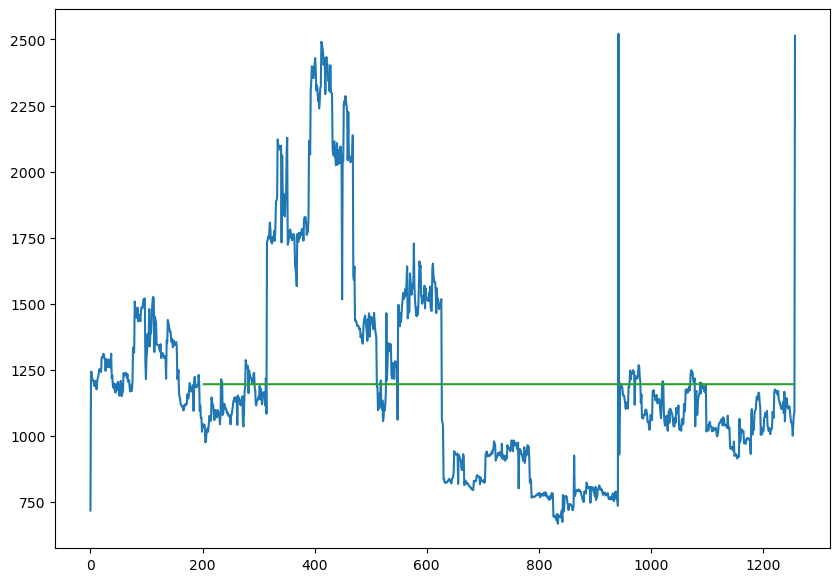

In [60]:
look_back=100
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict

plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Prediction for next 30 days

In [61]:
len(test_data)

378

In [71]:
pred_input=test_data[278:].reshape(1,-1)
pred_input.shape

(1, 100)

In [72]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [73]:
temp_input

[0.21406757529649179,
 0.1665857317060011,
 0.17319542016035916,
 0.19279786763356965,
 0.19275470232121472,
 0.18797414397789936,
 0.18822774018798494,
 0.18939320362156975,
 0.16419005687029897,
 0.16460552300171583,
 0.16421163952647655,
 0.16310013273333546,
 0.17262887543569994,
 0.17060550141905972,
 0.17511627656015627,
 0.1747763497253607,
 0.17467922777256195,
 0.17342743371426717,
 0.17242923586605807,
 0.16197243894806135,
 0.14234301315462894,
 0.2234991960460574,
 0.23415563253369598,
 0.1817475476706919,
 0.20770608738817486,
 0.19063420635177575,
 0.20547767813784845,
 0.22803155384333162,
 0.23171679238563891,
 0.2328552774990018,
 0.25223110708234864,
 0.25970410178380654,
 0.25965554080740716,
 0.25354764910917593,
 0.26775443253801245,
 0.26534796637422164,
 0.2469811259671728,
 0.23815381959057713,
 0.1814561818122956,
 0.19614857500512584,
 0.18248675364477107,
 0.18623134449156653,
 0.1904237754540451,
 0.18977629576872024,
 0.21538951298736342,
 0.218362523875813

In [74]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        pred_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape((1,n_steps, 1))
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)
        

[0.25833464]
101
1 day input [0.16658573 0.17319542 0.19279787 0.1927547  0.18797414 0.18822774
 0.1893932  0.16419006 0.16460552 0.16421164 0.16310013 0.17262888
 0.1706055  0.17511628 0.17477635 0.17467923 0.17342743 0.17242924
 0.16197244 0.14234301 0.2234992  0.23415563 0.18174755 0.20770609
 0.19063421 0.20547768 0.22803155 0.23171679 0.23285528 0.25223111
 0.2597041  0.25965554 0.25354765 0.26775443 0.26534797 0.24698113
 0.23815382 0.18145618 0.19614858 0.18248675 0.18623134 0.19042378
 0.1897763  0.21538951 0.21836252 0.22631573 0.21788771 0.21901
 0.23028694 0.19948849 0.19653706 0.1897709  0.19606764 0.18733206
 0.18279431 0.1940011  0.19256046 0.19478887 0.22805853 0.22157834
 0.21650642 0.26731738 0.27373283 0.27387312 0.27092169 0.26761415
 0.27070586 0.2630656  0.27068967 0.25319154 0.25020773 0.24469336
 0.24496315 0.23593081 0.23436067 0.23633009 0.23669699 0.24902608
 0.2256143  0.26948105 0.20910356 0.23550455 0.24282107 0.25655843
 0.24740738 0.23652972 0.23907108 0.

11 day output [[0.28303507]]
12 day input [0.17262888 0.1706055  0.17511628 0.17477635 0.17467923 0.17342743
 0.17242924 0.16197244 0.14234301 0.2234992  0.23415563 0.18174755
 0.20770609 0.19063421 0.20547768 0.22803155 0.23171679 0.23285528
 0.25223111 0.2597041  0.25965554 0.25354765 0.26775443 0.26534797
 0.24698113 0.23815382 0.18145618 0.19614858 0.18248675 0.18623134
 0.19042378 0.1897763  0.21538951 0.21836252 0.22631573 0.21788771
 0.21901    0.23028694 0.19948849 0.19653706 0.1897709  0.19606764
 0.18733206 0.18279431 0.1940011  0.19256046 0.19478887 0.22805853
 0.22157834 0.21650642 0.26731738 0.27373283 0.27387312 0.27092169
 0.26761415 0.27070586 0.2630656  0.27068967 0.25319154 0.25020773
 0.24469336 0.24496315 0.23593081 0.23436067 0.23633009 0.23669699
 0.24902608 0.2256143  0.26948105 0.20910356 0.23550455 0.24282107
 0.25655843 0.24740738 0.23652972 0.23907108 0.23427973 0.23937324
 0.23014665 0.21660354 0.20710717 0.20702084 0.19938058 0.1798159
 0.20520789 0.2224848

21 day output [[0.28235406]]
22 day input [0.23415563 0.18174755 0.20770609 0.19063421 0.20547768 0.22803155
 0.23171679 0.23285528 0.25223111 0.2597041  0.25965554 0.25354765
 0.26775443 0.26534797 0.24698113 0.23815382 0.18145618 0.19614858
 0.18248675 0.18623134 0.19042378 0.1897763  0.21538951 0.21836252
 0.22631573 0.21788771 0.21901    0.23028694 0.19948849 0.19653706
 0.1897709  0.19606764 0.18733206 0.18279431 0.1940011  0.19256046
 0.19478887 0.22805853 0.22157834 0.21650642 0.26731738 0.27373283
 0.27387312 0.27092169 0.26761415 0.27070586 0.2630656  0.27068967
 0.25319154 0.25020773 0.24469336 0.24496315 0.23593081 0.23436067
 0.23633009 0.23669699 0.24902608 0.2256143  0.26948105 0.20910356
 0.23550455 0.24282107 0.25655843 0.24740738 0.23652972 0.23907108
 0.23427973 0.23937324 0.23014665 0.21660354 0.20710717 0.20702084
 0.19938058 0.1798159  0.20520789 0.22248481 0.22729774 0.99586153
 0.25833464 0.26149189 0.26510578 0.26869294 0.27198344 0.2748445
 0.27722985 0.2791460

# Plotting last 130 days closing price

In [75]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [77]:
len(close_srt)

1258

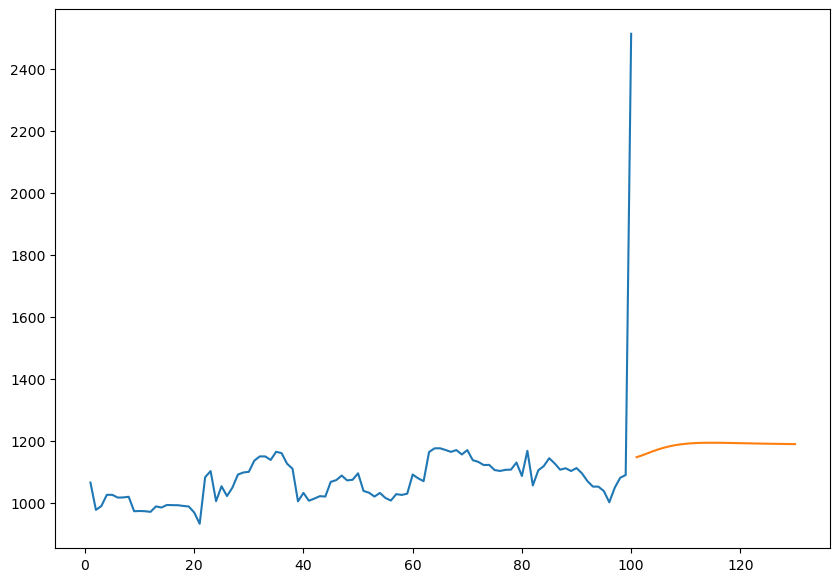

In [79]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_srt[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# Appending in a list is done to make continuous graph 

In [80]:
df3=close_srt.tolist()
df3.extend(lst_output)

In [81]:
print(len(df3))

1288


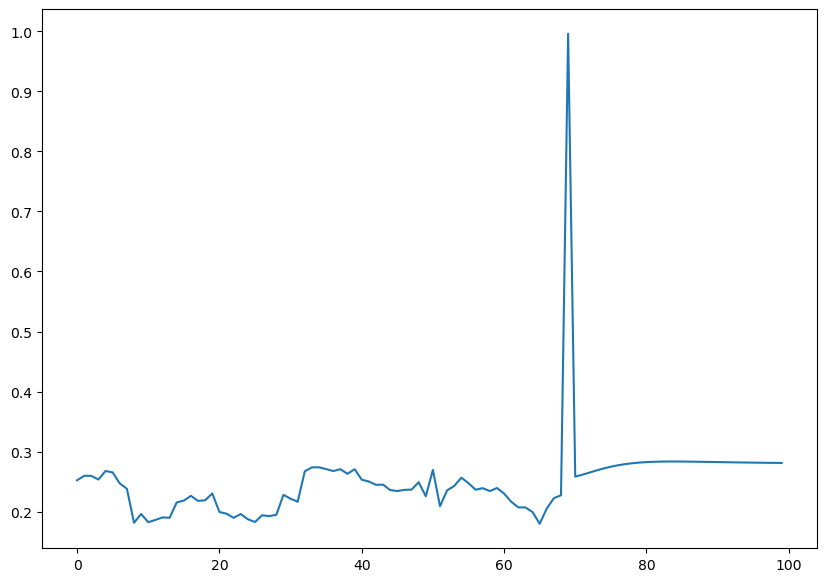

In [82]:
plt.figure(figsize=(10,7))
plt.plot(df3[1188:])

# Plotting the graph with predicted 30 days output

In [83]:
df3=scaler.inverse_transform(df3).tolist()

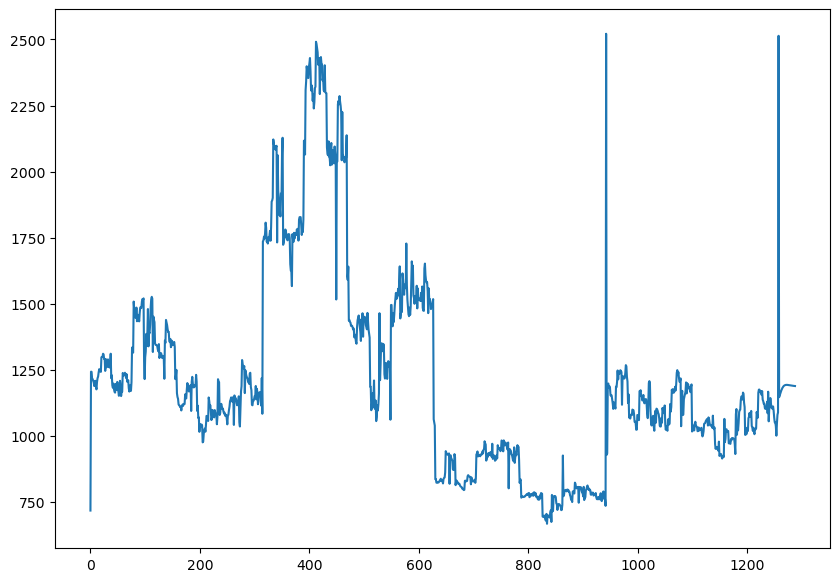

In [84]:
plt.figure(figsize=(10,7))
plt.plot(df3)